# Classification project: Predicting fraudulent credit card transactions

### Adrián P. Bustamante, Ph.D.
### email: adrianpebus@gmail.com

#### Table of contents

[1. Objective](#objective)

[2. About the data](#data)

[3. EDA and Feature Engineering](#eda)

[4. Classification Models](#models)

[5. Summary of results and interpretability](#summary)

[6. Conclusion](#conclusion)

## 1. Objective <a class="anchor" id="objective"></a>

We study a dataset containing transactions made by credit cards that occurred during two days in 2013. The dataset is highly unbalanced, we have 492 frauds out of  284 807 transactions, roughly the 0.172% of all transactions. 

The objective of this study is to train different classification models to predict whether a transaction is fraudulent or not. We want to find a model that performs well on precision, recall, and fscore.

Our focus is on predictability but we also include a couple of results on interpretability. To measure the performance of the models considered we will be focusing on precision, recall and f1score.

## 2. About the data <a class="anchor" id="data"></a>

The datasets contains transactions made by credit cards in September 2013 by european cardholders. This dataset present transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-senstive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

The dataset has been collected and analysed during a research collaboration of Worldline and the Machine Learning Group (mlg.ulb.ac.be) of ULB (Université Libre de Bruxelles) on big data mining and fraud detection. More details on current and past projects on related topics are available on http://mlg.ulb.ac.be/BruFence and http://mlg.ulb.ac.be/ARTML.

The dataset used for this project can be found at https://www.kaggle.com/datasets/qnqfbqfqo/credit-card-fraud-detection-date-25th-of-june-2015

In [1]:
##importing the data 
import kagglehub

# Download latest version
path = kagglehub.dataset_download("qnqfbqfqo/credit-card-fraud-detection-date-25th-of-june-2015")

print("Path to dataset files:", path)

Path to dataset files: /home/adrian/.cache/kagglehub/datasets/qnqfbqfqo/credit-card-fraud-detection-date-25th-of-june-2015/versions/1


In [43]:
import pandas as pd, numpy as np, seaborn as sns, matplotlib.pyplot as plt
%matplotlib inline
import time
plt.style.use('dark_background')

In [3]:
data = pd.read_csv(path + '/creditcard_csv.csv')
df = data.copy()
print(df.shape)
df.head()

(284807, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,'0'
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,'0'
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,'0'
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,'0'
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,'0'


## 3. EDA and Feature Engineering <a class="anchor" id="eda"></a>

##### Feature Enginering

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,6.406204e-16,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000


In [6]:
## we drop the feature time, because it only marks the time passed since the first transaction in the dataset.
df.drop('Time', axis=1, inplace=True)
df.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class'],
      dtype='object')

In [7]:
df['Class'].value_counts()

Class
'0'    284315
'1'       492
Name: count, dtype: int64

In [8]:
## we transform the class column to an integer
to_int = []
for i in df.index:
    to_int.append( int( list( df.loc[i, 'Class'] )[1] ) )

df['Class']=to_int
df['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [9]:
###duplicated rows
df[df.duplicated()]

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
33,-0.529912,0.873892,1.347247,0.145457,0.414209,0.100223,0.711206,0.176066,-0.286717,-0.484688,...,0.046949,0.208105,-0.185548,0.001031,0.098816,-0.552904,-0.073288,0.023307,6.14,0
35,-0.535388,0.865268,1.351076,0.147575,0.433680,0.086983,0.693039,0.179742,-0.285642,-0.482474,...,0.049526,0.206537,-0.187108,0.000753,0.098117,-0.553471,-0.078306,0.025427,1.77,0
113,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,-0.243289,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
114,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,-0.243289,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
115,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,-0.243289,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284708,2.018105,0.073226,-1.615154,0.351058,0.333905,-0.676284,0.050474,-0.071028,0.302728,-0.193920,...,-0.306646,-0.841768,0.356773,0.655112,-0.331463,0.144352,-0.069820,-0.039845,1.98,0
284751,2.050734,-0.364010,-2.542843,-0.729357,2.388455,3.318015,-0.479138,0.791559,0.403374,0.093232,...,-0.293363,-0.834802,0.381740,0.698179,-0.264798,0.219275,-0.052131,-0.066940,0.89,0
284775,1.955547,-0.724606,-1.706511,-0.611145,1.710907,3.914215,-1.248690,1.054133,1.314064,-0.150553,...,0.193605,0.690196,0.155951,0.726775,-0.061219,-0.192666,0.060347,-0.042323,12.99,0
284785,0.032887,0.545338,-1.185844,-1.729828,2.932315,3.401529,0.337434,0.925377,-0.165663,-0.386953,...,-0.266113,-0.716336,0.108519,0.688519,-0.460220,0.161939,0.265368,0.090245,1.79,0


In [10]:
## getting rid of duplicated values
df.drop_duplicates(keep='first', inplace=True)
df[df.duplicated()]

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class


In [11]:
df['Class'].value_counts()

Class
0    275190
1       473
Name: count, dtype: int64

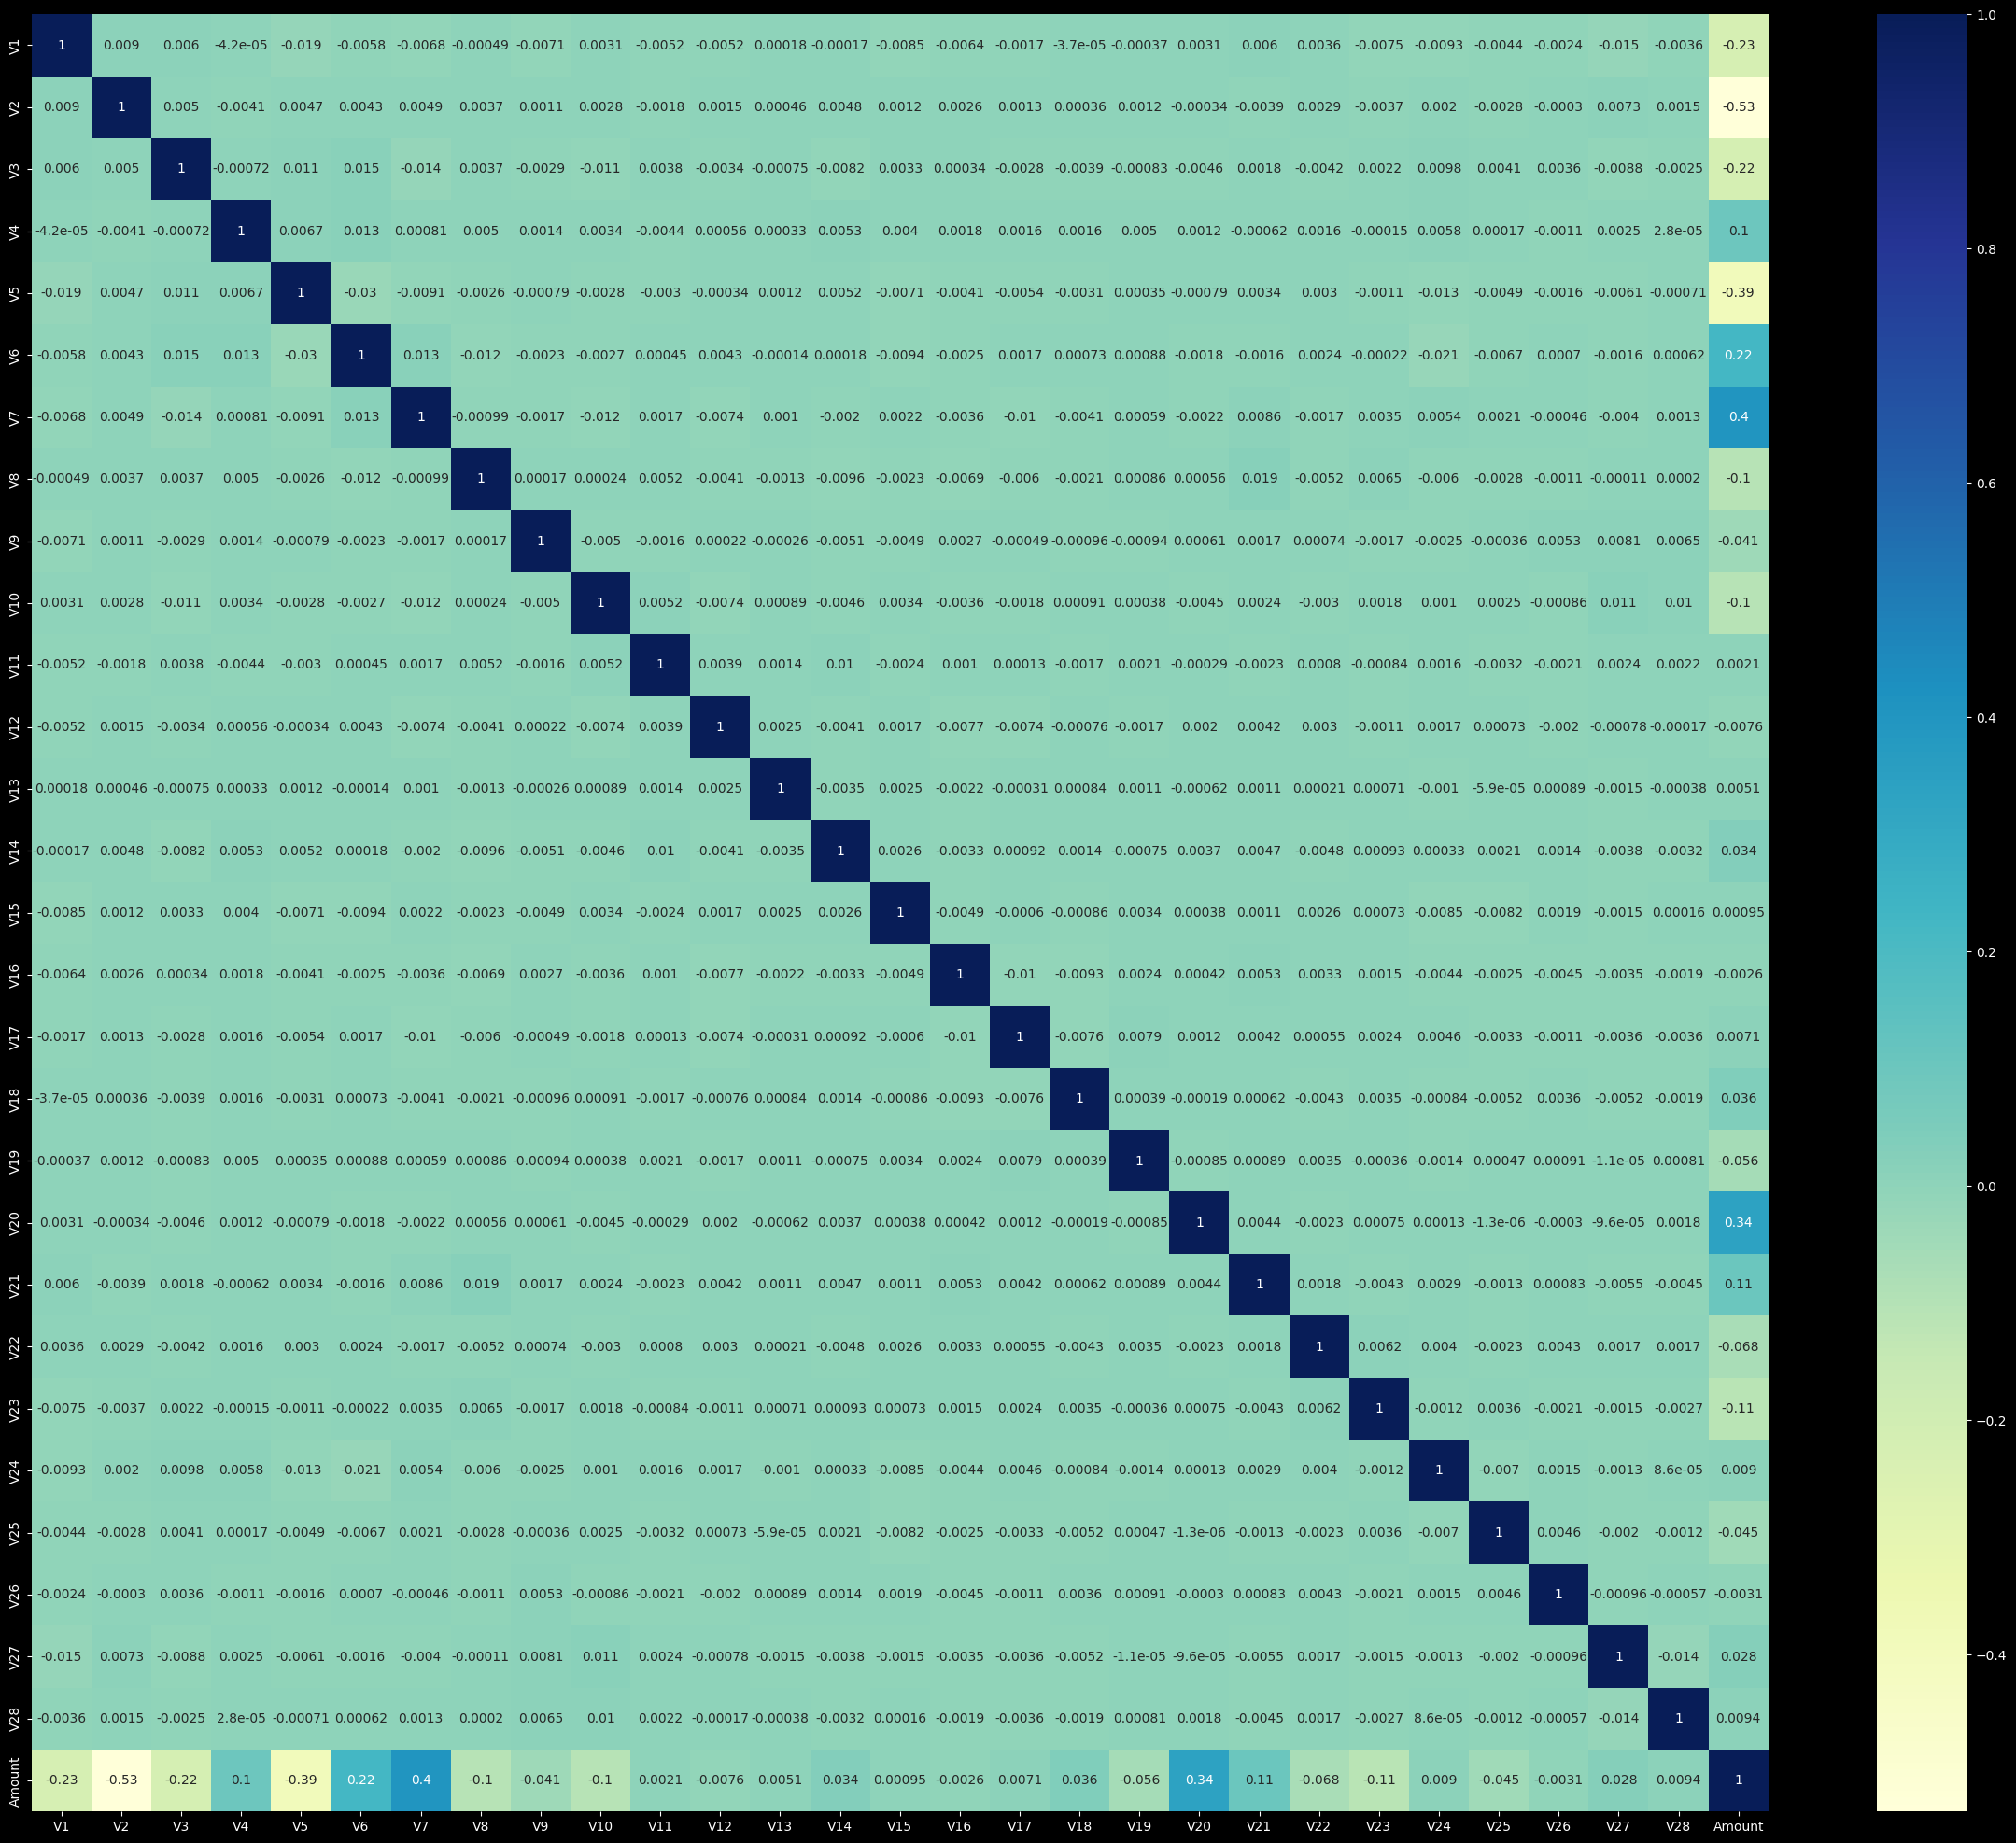

In [12]:
plt.figure(figsize=(30,25))
sns.heatmap(df.iloc[:, :-1].corr(), annot=True, cmap = 'YlGnBu')
plt.show()

##### Imbalanced classes

Class
0    0.998284
1    0.001716
Name: proportion, dtype: float64


<Axes: xlabel='Class'>

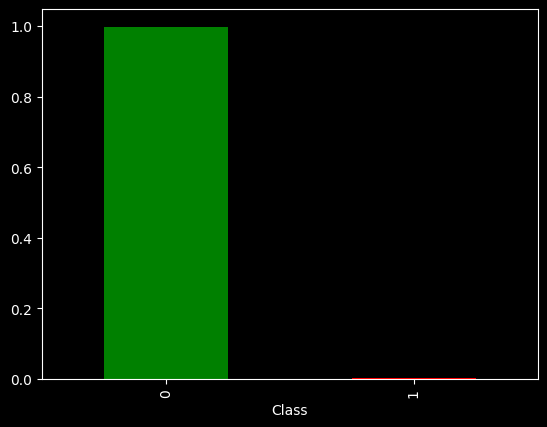

In [13]:
print(df['Class'].value_counts(normalize='true') )
df['Class'].value_counts(normalize='true').plot.bar(color = ['green', 'red'])

## 4. Classification Models <a class="anchor" id="models"></a>

##### Utility methods

In [14]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix, ConfusionMatrixDisplay, roc_auc_score
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import MinMaxScaler

results_final = []

def eval_metrics(ytrue, ypred, eval_type='Train_Test_split', model = 'model'):
    results_pos = {}
    results_pos['type'] = eval_type
    #Accuracy
    results_pos['accuracy'] = accuracy_score(ytrue, ypred)
    #presion, recall, fscore
    precision, recall, fscore, _ =precision_recall_fscore_support(ytrue, ypred, pos_label=1, average='binary')
    results_pos['precision'] = precision
    results_pos['recall'] = recall
    results_pos['fscore'] = fscore
    results_pos['auc'] = roc_auc_score(ytrue, ypred)
    results_pos['model'] = model
    return results_pos
    
def visualize_eval_metrics(results, weights = True):
    df = pd.DataFrame(data=results)
    #table = pd.pivot_table(df, values='type', index=['accuracy', 'precision', 'recall', 'f1', 'auc'],
    #                columns=['type'])
    #df = df.set_index('type').transpose()
    print(df.drop('model', axis=1))
    x = np.arange(5)
    normal = df.iloc[0, 1:-1].values
    smote = df.iloc[1, 1:-1].values
    under = df.iloc[2, 1:-1].values
    if weights:
        class_weight = df.iloc[3, 1:-1].values
    width = 0.2
    plt.figure(figsize=(10, 8), dpi=80)
    plt.bar(x-0.2, normal, width, color='#95a5a6')
    plt.bar(x, smote, width, color='#2980b9')
    plt.bar(x+0.2, under, width, color='firebrick')
    plt.xticks(x, ['Accuracy', 'Precision', 'Recall', 'Fscore', 'AUC'])
    plt.ylabel('Score')
    plt.xlabel('Evaluation Metrics')
    if weights:
        plt.bar(x+0.4, class_weight, width, color='forestgreen')
        plt.legend(['Normal', 'SMOTE', "Undersampling", 'Class Weight'])
    else:
        plt.legend(["Normal", "SMOTE", "Undersampling"])
    plt.show()

def visualize_results(results):
    df = pd.DataFrame(data=results)
    df = df.drop('type', axis=1)
    print(df)
    dff = df.drop(['accuracy', 'auc'], axis=1)
    dff = dff.set_index('model').stack().to_frame().reset_index().rename(columns={0:'model', 'level_1':'metrics', 'model':'values'})
    
    fig, (ax1, ax2) = plt.subplots(figsize =(15,5), ncols=2, sharey=False)
    
    sns.barplot(data = dff, x='model', y='values', hue='metrics', ax=ax1)
    ax1.set_ylabel('')
    ax1.legend(loc=2)
    
    sns.lineplot(data = df,x = 'model', y='precision', ax=ax2, marker='o', label='precision')
    sns.lineplot(data=df, x='model', y='recall', ax=ax2, marker="o", label='recall')
    sns.lineplot(data=df, x='model', y='fscore', ax=ax2, marker="o", label='fscore')
    sns.lineplot(data=df, x='model', y='auc', ax=ax2, marker="o", label='auc')
    plt.xticks(rotation=90)
    ax2.set_ylabel('')
    ax2.legend(loc=2)
    plt.show()


def cf_plot(ytrue, ypred, model):
    cf = confusion_matrix(ytrue, ypred)#, normalize='true')
    sns.set_context('talk')
    disp = ConfusionMatrixDisplay(confusion_matrix=cf,display_labels=model.classes_)
    disp.plot()
    plt.show()

def splits_data(data, minmax_scaler = False, tests_sizes = 0.2):
    X_raw = data.iloc[:,:-1].copy()
    y = data['Class'].astype(int).copy()
    if minmax_scaler:
        X = MinMaxScaler().fit_transform(X_raw)
    else:
        X = X_raw.copy()
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= tests_sizes, stratify=y, random_state=666)
    X_smo, y_smo = SMOTE(random_state=666, sampling_strategy='minority').fit_resample(X_train, y_train)
    X_under, y_under = RandomUnderSampler(random_state=666).fit_resample(X_train, y_train)
    return X_train, X_test, y_train, y_test, X_smo, y_smo, X_under, y_under

### Logistic Regression

##### scaling and splits

Since we have very imbalanced classes we are going to use different samplings of data: oversampling, undersampling

In [15]:
##large test set to speed up computations
X_train, X_test, y_train, y_test, X_smo, y_smo, X_under, y_under = splits_data(df, minmax_scaler=True, tests_sizes=0.5)
X_train.shape, y_train.shape, X_test.shape, y_test.shape, X_smo.shape, y_smo.shape, X_under.shape, y_under.shape, df.shape

((137831, 29),
 (137831,),
 (137832, 29),
 (137832,),
 (275190, 29),
 (275190,),
 (472, 29),
 (472,),
 (275663, 30))

##### training models

0.14848048289616902 mins

0.18832695484161377 mins

0.000820151964823405 mins

Fitting 3 folds for each of 3 candidates, totalling 9 fits


/home/adrian/Documents/ibm-certifications/machine-learning/j-notebooks/venv/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/adrian/Documents/ibm-certifications/machine-learning/j-notebooks/venv/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/adrian/Documents/ibm-certifications/machine-learning/j-notebooks/venv/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/adrian/Documents/ibm-certifications/machine-learning/j-notebooks/venv/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/adrian/Documents/ibm-certification

0.5524347146352132 mins

                   type  accuracy  precision    recall    fscore       auc
0      Train_Test_split  0.999028   0.870504  0.510549  0.643617  0.755209
1                 SMOTE  0.974991   0.058095  0.890295  0.109072  0.932716
2  Random Undersampling  0.997838   0.434409  0.852321  0.575499  0.925205
3           best weight  0.999253   0.776860  0.793249  0.784969  0.896428


/home/adrian/Documents/ibm-certifications/machine-learning/j-notebooks/venv/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


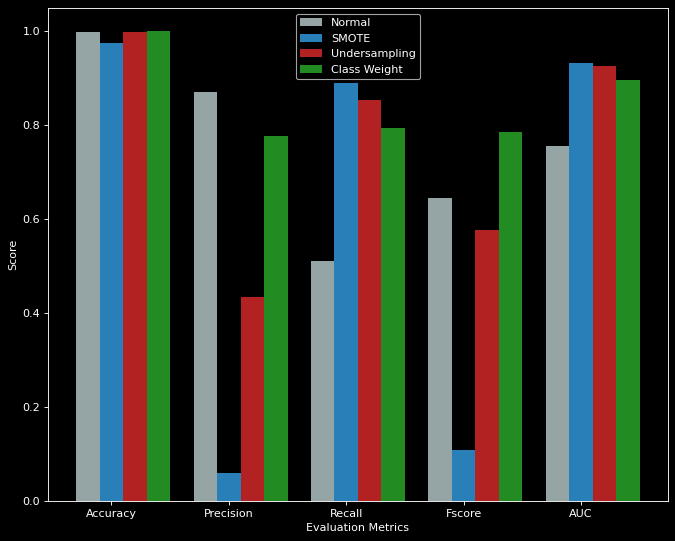

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

logreg = LogisticRegression(penalty='l2', solver='sag', random_state=666)
results_logreg = []

t0 = time.time()
##normal splitting
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)
results_logreg.append(eval_metrics(y_test, y_pred_logreg, model= 'log_reg'))
#cf_plot(y_test, y_pred, logreg)
t1= time.time()
print((t1-t0)/60, 'mins\n')

t0 = time.time()
##smote oversampling
logreg.fit(X_smo, y_smo)
y_pred_smo_logreg = logreg.predict(X_test)
results_logreg.append(eval_metrics(y_test, y_pred_smo_logreg, eval_type='SMOTE', model= 'log_reg'))
#cf_plot(y_test, y_pred_smo, logreg)
t1= time.time()
print((t1-t0)/60, 'mins\n')

t0=time.time()
#random undersampling
logreg.fit(X_under, y_under)
y_pred_under_logreg = logreg.predict(X_test)
results_logreg.append(eval_metrics(y_test, y_pred_under_logreg, eval_type='Random Undersampling', model= 'log_reg'))
#cf_plot(y_test, y_pred_smo, logreg)
t1= time.time()
print((t1-t0)/60, 'mins\n')

t0=time.time()
##Class weight
params_grid = { 'class_weight':[ {0: 0.05, 1: 0.95}, {0: 0.025, 1: 0.975}, {0: 0.01, 1: 0.99} ] }
search = GridSearchCV(estimator= logreg, param_grid=params_grid, scoring='f1', cv =3, verbose=1, n_jobs=6)
search.fit(X_train, y_train)
search.best_params_
best_logreg = search.best_estimator_
best_logreg.fit(X_train, y_train)
y_pred_best_logreg = best_logreg.predict(X_test)
results_logreg.append(eval_metrics(y_test, y_pred_best_logreg, eval_type='best weight', model= 'log_reg'))
#cf_plot(y_test, y_pred_best, best_logreg)
t1= time.time()
print((t1-t0)/60, 'mins\n')

visualize_eval_metrics(results_logreg)

LogisticRegression(class_weight={0: 0.01, 1: 0.99}, random_state=666,
                   solver='sag')


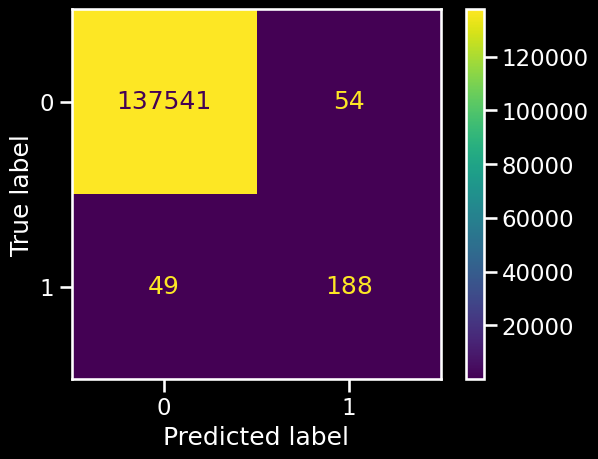

In [17]:
### best log reg model considered
results_final.append( eval_metrics(y_test, y_pred_best_logreg, eval_type='best weight', model= 'log_reg') )

print(best_logreg)
cf_plot(y_test, y_pred_best_logreg, best_logreg)

### K-Nearest Neighbors

##### scaling and splits

In [18]:
##we take stratified sample to speed up the computations
#df_not_used, df_sample = train_test_split( df, test_size = 0.5, stratify=df['Class'], random_state=666)
X_train, X_test, y_train, y_test, X_smo, y_smo, X_under, y_under = splits_data(df, minmax_scaler=True, tests_sizes=0.5)
X_train.shape, X_test.shape, X_smo.shape, X_under.shape

((137831, 29), (137832, 29), (275190, 29), (472, 29))

##### training models

Fitting 3 folds for each of 4 candidates, totalling 12 fits
1.2700085679690043 mins

Fitting 3 folds for each of 4 candidates, totalling 12 fits
5.466305772463481 mins

Fitting 3 folds for each of 4 candidates, totalling 12 fits
0.0031762480735778808 mins

               type  accuracy  precision    recall    fscore       auc
0  Train_Test_split  0.999470   0.931579  0.746835  0.829040  0.873370
1             SMOTE  0.998622   0.565097  0.860759  0.682274  0.929809
2     Undersampling  0.983748   0.085986  0.877637  0.156627  0.930784


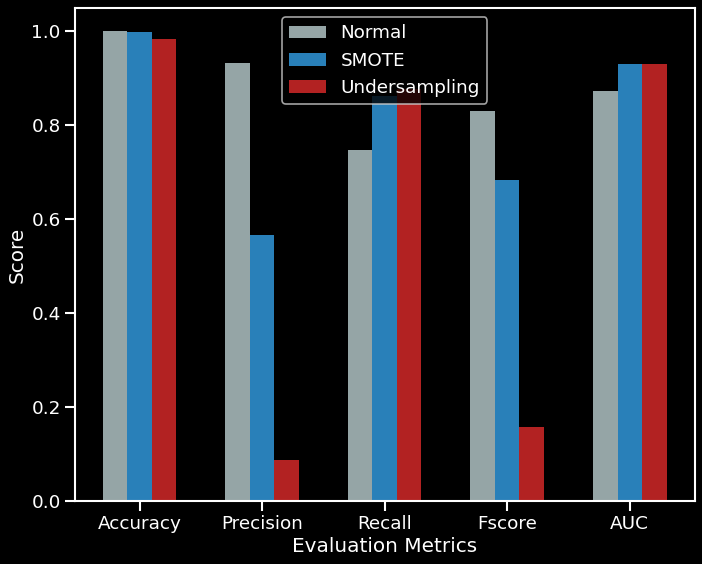

In [19]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
params_grid_knn = { 'n_neighbors' : [ 3,5,7,9] }
search_knn = GridSearchCV(estimator=knn, param_grid = params_grid_knn, scoring='f1', cv=3, n_jobs=7, verbose=1)
results_knn = []

t0=time.time()
###Normal sample
search_knn.fit(X_train, y_train)
best_knn = search_knn.best_estimator_
best_knn.fit(X_train, y_train)
y_pred_knn = best_knn.predict(X_test)
results_knn.append(eval_metrics(y_test, y_pred_knn))
#cf_plot(y_test, y_pred_best_knn, best_knn)
t1= time.time()
print((t1-t0)/60, 'mins\n')

t0=time.time()
###SMOTE sample
search_knn.fit(X_smo, y_smo)
best_knn_smo = search_knn.best_estimator_
best_knn_smo.fit(X_smo, y_smo)
y_pred_knn_smo = best_knn_smo.predict(X_test)
results_knn.append( eval_metrics(y_test, y_pred_knn_smo, eval_type='SMOTE') )
#cf_plot(y_test, y_pred_knn_smo, knn)
t1= time.time()
print((t1-t0)/60, 'mins\n')

t0=time.time()
search_knn.fit(X_under, y_under)
best_knn_under = search_knn.best_estimator_
best_knn_under.fit(X_under, y_under)
y_pred_knn_under = best_knn_under.predict(X_test)
results_knn.append( eval_metrics(y_test, y_pred_knn_under, eval_type='Undersampling') )
#cf_plot(y_test, y_pred_knn_under, knn)
t1= time.time()
print((t1-t0)/60, 'mins\n')


visualize_eval_metrics(results_knn, weights=False)

KNeighborsClassifier()


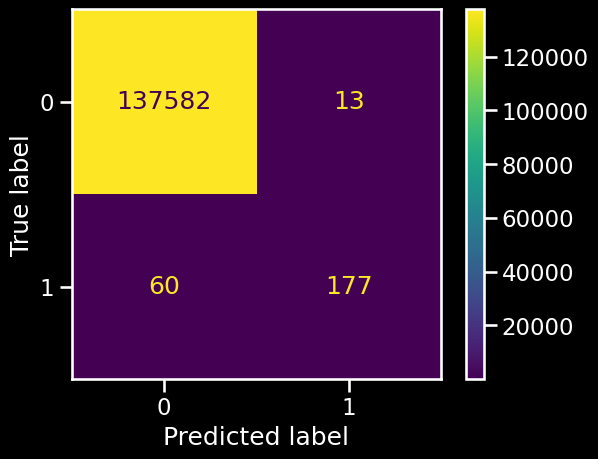

In [20]:
## best knn model considered
results_final.append( eval_metrics(y_test, y_pred_knn, eval_type='test_train', model= 'knn') )
print(best_knn)
cf_plot(y_test, y_pred_knn, best_knn)

### Support Vector Classifier

##### scaling and splits

In [21]:
## we take a big test set to speed up the computations
X_train, X_test, y_train, y_test, X_smo, y_smo, X_under, y_under = splits_data(df, minmax_scaler=True, tests_sizes=0.5)
X_train.shape, y_train.shape, X_test.shape, y_test.shape, X_smo.shape, y_smo.shape, X_under.shape, y_under.shape, df.shape

((137831, 29),
 (137831,),
 (137832, 29),
 (137832,),
 (275190, 29),
 (275190,),
 (472, 29),
 (472,),
 (275663, 30))

##### training modelsfrom sklearn.svm import SVC

Fitting 3 folds for each of 60 candidates, totalling 180 fits
8.468135229746501 mins

Fitting 3 folds for each of 60 candidates, totalling 180 fits
0.011241563161214193 mins

Fitting 3 folds for each of 60 candidates, totalling 180 fits
1.3920219222704568 mins

                  type  accuracy  precision    recall    fscore       auc
0     Train_Test_split  0.999536   0.917874  0.801688  0.855856  0.900782
1  Random Undersampler  0.965705   0.043699  0.907173  0.083382  0.936489
2                SMOTE  0.998097   0.459936  0.618534  0.527574  0.808642


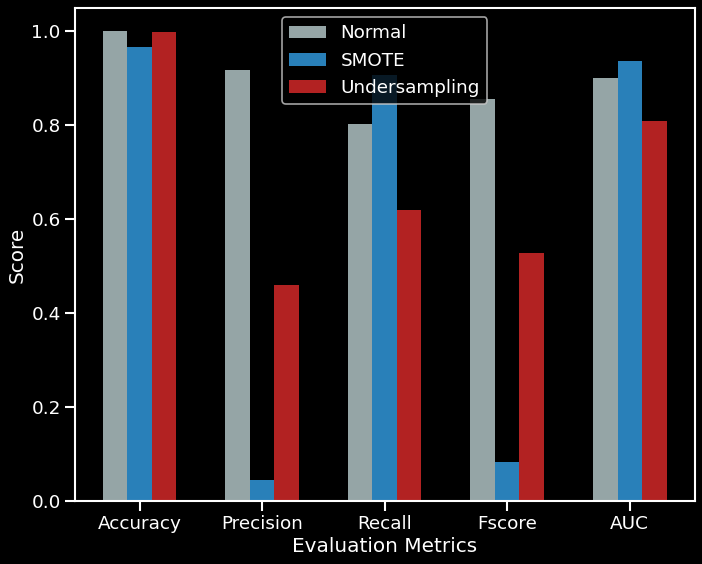

In [22]:
from sklearn.svm import SVC
import time

svc = SVC()
params_grid = {'C':[0.01, 0.1, 1, 10, 100], 'kernel':['poly', 'rbf', 'sigmoid'], 'degree': [2,3,4,5]}
search_svc = GridSearchCV(estimator = svc, param_grid=params_grid, scoring='f1', cv=3, n_jobs=-1, verbose=1)
results_svc = []

t0= time.time()
##normal sample
search_svc.fit(X_train, y_train)
best_svc = search_svc.best_estimator_
best_svc.fit(X_train, y_train)
y_pred_svc = best_svc.predict(X_test)
results_svc.append(eval_metrics(y_test, y_pred_svc))
#cf_plot(y_test, y_pred_svc, best_svc)
t1 = time.time()
print((t1-t0)/60, 'mins\n')

t0=time.time()
##Random undersample
search_svc.fit(X_under, y_under)
best_svc_under = search_svc.best_estimator_
best_svc_under.fit(X_under, y_under)
y_pred_svc_under = best_svc_under.predict(X_test)
results_svc.append( eval_metrics( y_test, y_pred_svc_under, eval_type='Random Undersampler' ) )
#cf_plot(y_test, y_pred_svc_under, best_svc)
t1 = time.time()
print((t1-t0)/60, 'mins\n')

###reduce even more the train data to speed up the computations
X_train_smo, X_test_smo, y_train_smo, y_test_smo, X_smo, y_smo, X_under, y_under = splits_data(df, minmax_scaler=True, tests_sizes=0.98)
t0=time.time()
##SMOTE sample
search_svc.fit(X_smo, y_smo)
best_svc_smo = search_svc.best_estimator_
best_svc_smo.fit(X_smo, y_smo)
y_pred_svc_smo = best_svc_smo.predict(X_test_smo)
results_svc.append(eval_metrics(y_test_smo, y_pred_svc_smo, eval_type ='SMOTE') )
#cf_plot(y_test, y_pred_svc_smo, best_svc)
t1 = time.time()
print((t1-t0)/60, 'mins\n')


visualize_eval_metrics(results_svc, weights=False)

{'C': 100, 'degree': 2, 'kernel': 'rbf'}


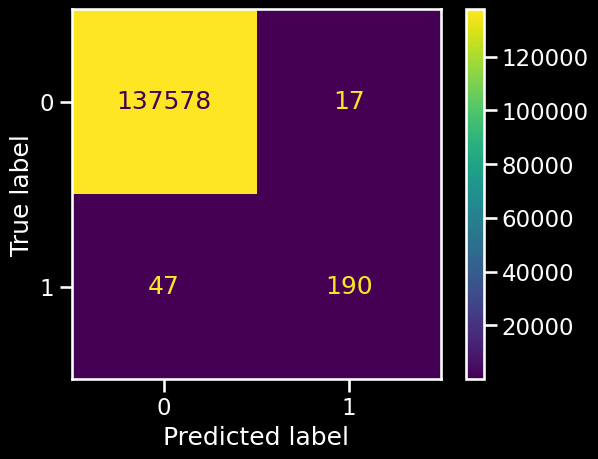

In [23]:
## best knn model considered
results_final.append( eval_metrics(y_test, y_pred_svc, eval_type='test_train', model= 'svc') )
print(search_svc.best_params_)
cf_plot(y_test, y_pred_svc, best_svc)

### Bagging Trees

##### test train splits

In [24]:
X_train, X_test, y_train, y_test, X_smo, y_smo, X_under, y_under = splits_data(df, minmax_scaler=False, tests_sizes=0.5)
X_train.shape, y_train.shape, X_test.shape, y_test.shape, X_smo.shape, y_smo.shape, X_under.shape, y_under.shape, df.shape

((137831, 29),
 (137831,),
 (137832, 29),
 (137832,),
 (275190, 29),
 (275190,),
 (472, 29),
 (472,),
 (275663, 30))

##### training model

Fitting 3 folds for each of 15 candidates, totalling 45 fits


/home/adrian/Documents/ibm-certifications/machine-learning/j-notebooks/venv/lib/python3.12/site-packages/sklearn/ensemble/_bagging.py:512: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn(


{'type': 'Train_Test_split', 'accuracy': 0.9995139009809043, 'precision': 0.9086538461538461, 'recall': 0.7974683544303798, 'fscore': 0.849438202247191, 'auc': np.float64(0.898665134008678), 'model': 'model'}
BaggingClassifier(estimator=DecisionTreeClassifier(max_depth=10,
                                                   random_state=666),
                  n_estimators=40, random_state=666, warm_start=True)


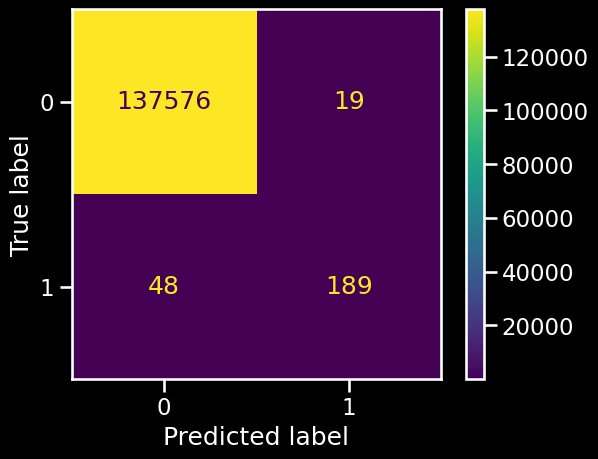

73.42269816795985 mins



In [25]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

param_grid_bag = {'n_estimators': [10*n+ 20 for n in range(3)],
     'estimator__max_depth' : [2*n + 8 for n in range(5) ] }
bag = BaggingClassifier(estimator=DecisionTreeClassifier(criterion='gini', random_state=666), 
                        random_state=666, bootstrap=True, warm_start=True)
search_bag = GridSearchCV(estimator=bag, param_grid=param_grid_bag, scoring='f1', cv=3, n_jobs=7, verbose=1)
results_bag = []


t0= time.time()
##normal sample
search_bag.fit(X_train, y_train)
best_bag = search_bag.best_estimator_
best_bag.fit(X_train, y_train)
y_pred_bag = best_bag.predict(X_test)
print( eval_metrics( y_test, y_pred_bag) )
results_bag.append( eval_metrics(y_test, y_pred_bag) )
print(best_bag)
#results_bag.append(eval_metrics(y_test, y_pred_svc))
cf_plot(y_test, y_pred_bag, best_bag)
t1 = time.time()
print((t1-t0)/60, 'mins\n')
results_final.append( eval_metrics(y_test, y_pred_bag, eval_type='test_train', model= 'bagging') )

### Random Forests

##### train test sets

In [26]:
X_train, X_test, y_train, y_test =train_test_split(df.drop('Class', axis=1), df['Class'], random_state=666,
                                                   stratify= df['Class'], test_size=0.5)
X_train.shape, X_test.shape

((137831, 29), (137832, 29))

##### training the model

Fitting 3 folds for each of 50 candidates, totalling 150 fits
{'type': 'Train_Test_split', 'accuracy': 0.9995646874455859, 'precision': 0.9538461538461539, 'recall': 0.7848101265822784, 'fscore': 0.8611111111111112, 'auc': np.float64(0.8923723586143704), 'model': 'model'}
RandomForestClassifier(max_depth=20, n_estimators=24, random_state=666,
                       warm_start=True)


/home/adrian/Documents/ibm-certifications/machine-learning/j-notebooks/venv/lib/python3.12/site-packages/sklearn/ensemble/_forest.py:466: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn(


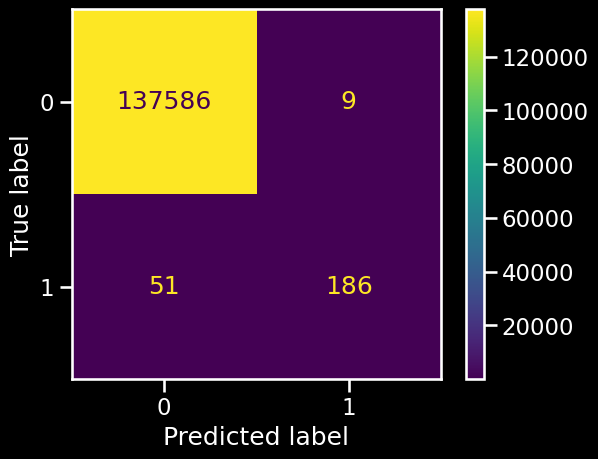

7.09867095152537 mins 



In [27]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=666, warm_start=True)
param_grid_rf = {'n_estimators': [2*n+10 for n in range(10)],'max_depth' : [5*n+5 for n in range(5) ]}
search_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf ,scoring='f1', n_jobs = 7, cv=3, verbose=1)

t0=time.time()
search_rf.fit(X_train, y_train)
best_rf = search_rf.best_estimator_
best_rf.fit(X_train, y_train)
y_pred_rf = best_rf.predict(X_test)
print( eval_metrics(y_test, y_pred_rf) )
print(best_rf)
#results_rf.append( eval_metrics( y_test, y_pred_rf) )
cf_plot(y_test, y_pred_rf, best_rf)
t1 = time.time()
print((t1-t0)/60, 'mins \n' )
results_final.append( eval_metrics(y_test, y_pred_rf, eval_type='test_train', model= 'rforest') )

### Gradient Boosting

##### train test sets

In [28]:
X_train, X_test, y_train, y_test, X_smo, y_smo, X_under, y_under = splits_data(df, minmax_scaler=True, tests_sizes=0.5)
X_train.shape, X_test.shape

((137831, 29), (137832, 29))

##### training 

Fitting 3 folds for each of 25 candidates, totalling 75 fits
{'type': 'Train_Test_split', 'accuracy': 0.9995646874455859, 'precision': 0.9538461538461539, 'recall': 0.7848101265822784, 'fscore': 0.8611111111111112, 'auc': np.float64(0.8923723586143704), 'model': 'model'}
{'learning_rate': 0.30000000000000004, 'n_estimators': 8}


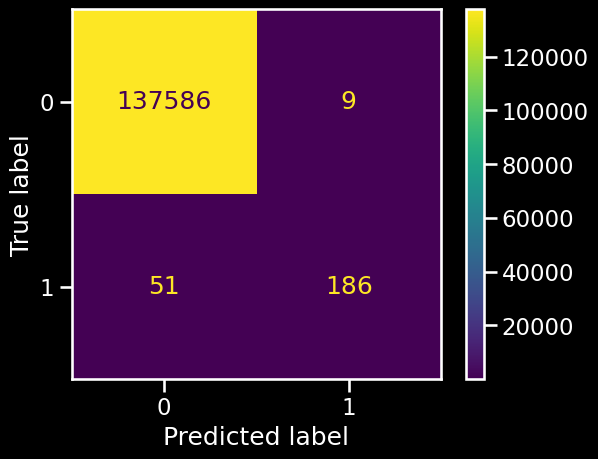

0.20588773488998413 mins 



In [29]:
from xgboost import XGBClassifier

xgb = XGBClassifier(objective='binary:logistic', learning_rate=0.1, n_estimators =10, eval_metric = 'mlogloss')
param_grid_xgb = {'learning_rate': [0.1*(n+1) for n in range(5)],
             'n_estimators' : [3*n+5 for n in range(5)]}
search_xgb = GridSearchCV(estimator=xgb, param_grid= param_grid_xgb, scoring='f1', n_jobs =7, cv=3, verbose=1)

t0=time.time()
search_xgb.fit(X_train, y_train)
best_xgb = search_xgb.best_estimator_
best_xgb.fit(X_train, y_train)
y_pred_xgb = best_xgb.predict(X_test)
print( eval_metrics(y_test, y_pred_xgb) )
print(search_xgb.best_params_)
#results_rf.append( eval_metrics( y_test, y_pred_rf) )
cf_plot(y_test, y_pred_xgb, best_xgb)
t1 = time.time()
print((t1-t0)/60, 'mins \n' )
results_final.append( eval_metrics(y_test, y_pred_xgb, eval_type='test_train', model= 'xgboost') )

### Stacking

##### train test sets

In [30]:
X_train, X_test, y_train, y_test, X_smo, y_smo, X_under, y_under = splits_data(df, minmax_scaler=True, tests_sizes=0.5)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((137831, 29), (137832, 29), (137831,), (137832,))

###### training the model

/home/adrian/Documents/ibm-certifications/machine-learning/j-notebooks/venv/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


{'type': 'Train_Test_split', 'accuracy': 0.9996082187010273, 'precision': 0.9552238805970149, 'recall': 0.810126582278481, 'fscore': 0.8767123287671232, 'auc': np.float64(0.9050305864624716), 'model': 'model'}


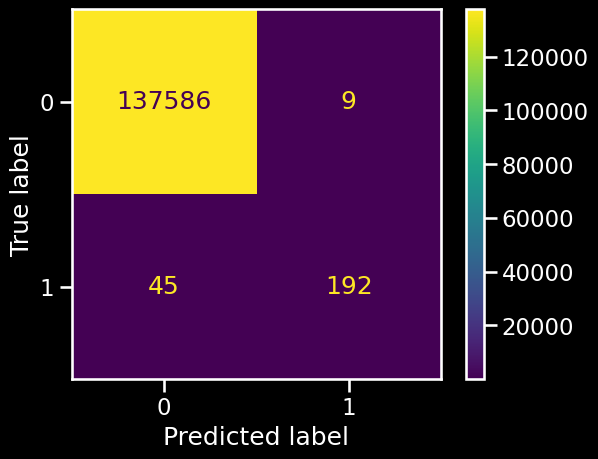

3.0962811787923177 mins 



/home/adrian/Documents/ibm-certifications/machine-learning/j-notebooks/venv/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/adrian/Documents/ibm-certifications/machine-learning/j-notebooks/venv/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/adrian/Documents/ibm-certifications/machine-learning/j-notebooks/venv/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/adrian/Documents/ibm-certifications/machine-learning/j-notebooks/venv/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/adrian/Documents/ibm-certification

{'type': 'Train_Test_split', 'accuracy': 0.9995501770271055, 'precision': 0.9629629629629629, 'recall': 0.7679324894514767, 'fscore': 0.8544600938967136, 'auc': np.float64(0.8839408077549182), 'model': 'model'}


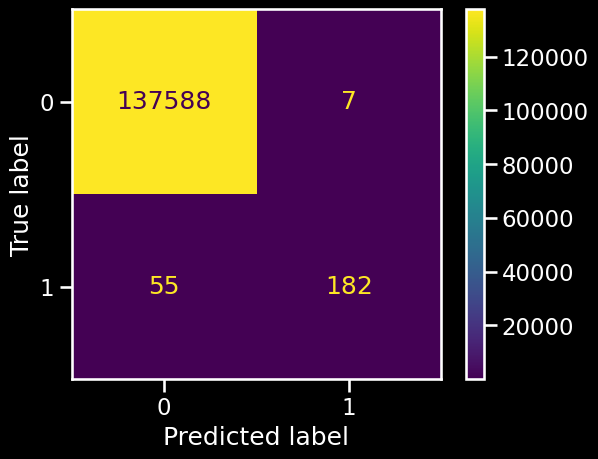

7.789094758033753 mins 



In [31]:
from sklearn.ensemble import VotingClassifier, StackingClassifier

estimators =[('logreg', best_logreg), ('knn', best_knn), ('svm', best_svc), ('bag', best_bag), ('rf', best_rf), 
             ('xgb', best_xgb)]

estimators 
#### Voting classifier
t0=time.time()
vc = VotingClassifier(estimators= estimators, voting = 'hard', n_jobs = 6)
vc.fit(X_train, y_train)
y_pred_vc = vc.predict(X_test)
print( eval_metrics(y_test, y_pred_vc) )
#results_vc.append( eval_metrics( y_test, y_pred_rf) )
cf_plot(y_test, y_pred_vc, vc)
t1 = time.time()
print((t1-t0)/60, 'mins \n' )

##### Stacking Classifier
t0=time.time()
sc = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression(), n_jobs=6)
sc.fit(X_train, y_train)
y_pred_sc =sc.predict(X_test)
print( eval_metrics(y_test, y_pred_sc))
#results_sc
cf_plot(y_test, y_pred_sc, sc)
t1 = time.time()
print((t1-t0)/60, 'mins \n' )


results_final.append( eval_metrics(y_test, y_pred_vc, eval_type='test_train', model= 'votingclass') )
results_final.append( eval_metrics(y_test, y_pred_sc, eval_type='test_train', model= ' stacking') )


## 5. Summary of results and interpretability <a class="anchor" id="summary"></a>

##### Summary

   accuracy  precision    recall    fscore       auc        model
0  0.999253   0.776860  0.793249  0.784969  0.896428      log_reg
1  0.999470   0.931579  0.746835  0.829040  0.873370          knn
2  0.999536   0.917874  0.801688  0.855856  0.900782          svc
3  0.999514   0.908654  0.797468  0.849438  0.898665      bagging
4  0.999565   0.953846  0.784810  0.861111  0.892372      rforest
5  0.999565   0.953846  0.784810  0.861111  0.892372      xgboost
6  0.999608   0.955224  0.810127  0.876712  0.905031  votingclass
7  0.999550   0.962963  0.767932  0.854460  0.883941     stacking


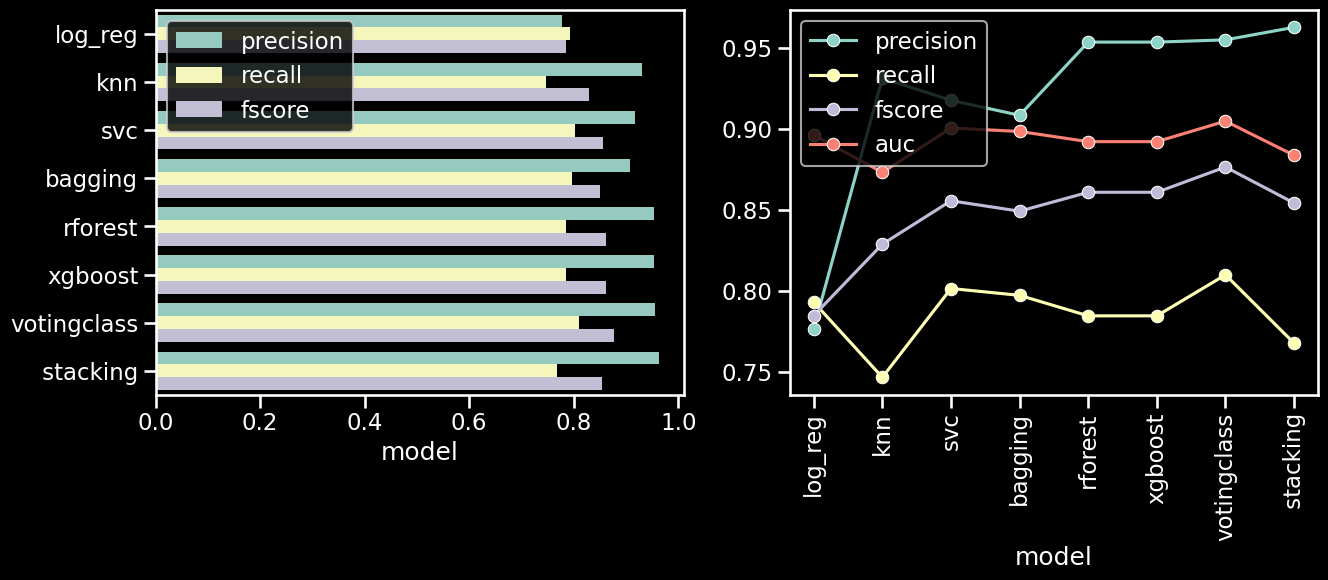

In [32]:

visualize_results(results_final)

#### Best model: Voting Classifier

/home/adrian/Documents/ibm-certifications/machine-learning/j-notebooks/venv/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


{'type': 'Train_Test_split', 'accuracy': 0.9996082187010273, 'precision': 0.9552238805970149, 'recall': 0.810126582278481, 'fscore': 0.8767123287671232, 'auc': np.float64(0.9050305864624716), 'model': 'model'}


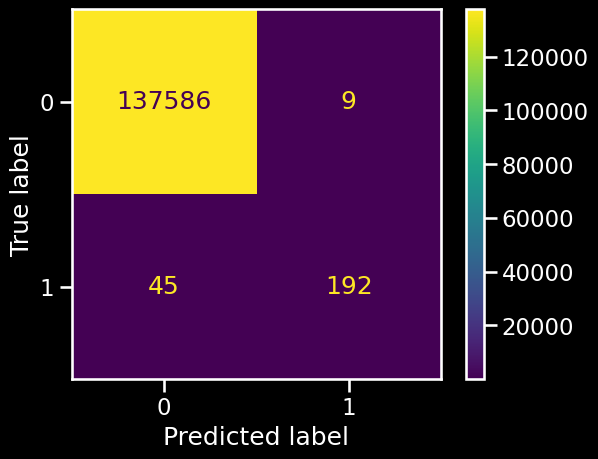

3.2310149470965066 mins 



In [33]:
from sklearn.ensemble import VotingClassifier, StackingClassifier

X_train, X_test, y_train, y_test, X_smo, y_smo, X_under, y_under = splits_data(df, minmax_scaler=True, tests_sizes=0.5)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

estimators =[('logreg', best_logreg), ('knn', best_knn), ('svm', best_svc), ('bag', best_bag), ('rf', best_rf), 
             ('xgb', best_xgb)]

#estimators =[('logreg', best_logreg), ('bag', best_bag), ('rf', best_rf), ('xgb', best_xgb)]
#### Voting classifier
t0=time.time()
vc = VotingClassifier(estimators= estimators, voting = 'hard', n_jobs = 6)
vc.fit(X_train, y_train)
y_pred_vc = vc.predict(X_test)
print( eval_metrics(y_test, y_pred_vc) )
#results_vc.append( eval_metrics( y_test, y_pred_rf) )
cf_plot(y_test, y_pred_vc, vc)
t1 = time.time()
print((t1-t0)/60, 'mins \n' )


### Permutation feature importance

In [34]:
def visualize_feature_importance(importance_array):
    # Sort the array based on mean value
    sorted_idx = importance_array.importances_mean.argsort()
    # Visualize the feature importances using boxplot
    fig, ax = plt.subplots()
    fig.set_figwidth(16)
    fig.set_figheight(10)
    #fig.tight_layout()
    ax.boxplot(importance_array.importances[sorted_idx].T[:10],
               vert=False, labels=df.drop('Class', axis=1).columns[sorted_idx])
    ax.set_title("Permutation Importances (train set)")
    plt.show()

71.82724478642146 mins 



/tmp/ipykernel_206053/3559526679.py:9: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(importance_array.importances[sorted_idx].T[:10],


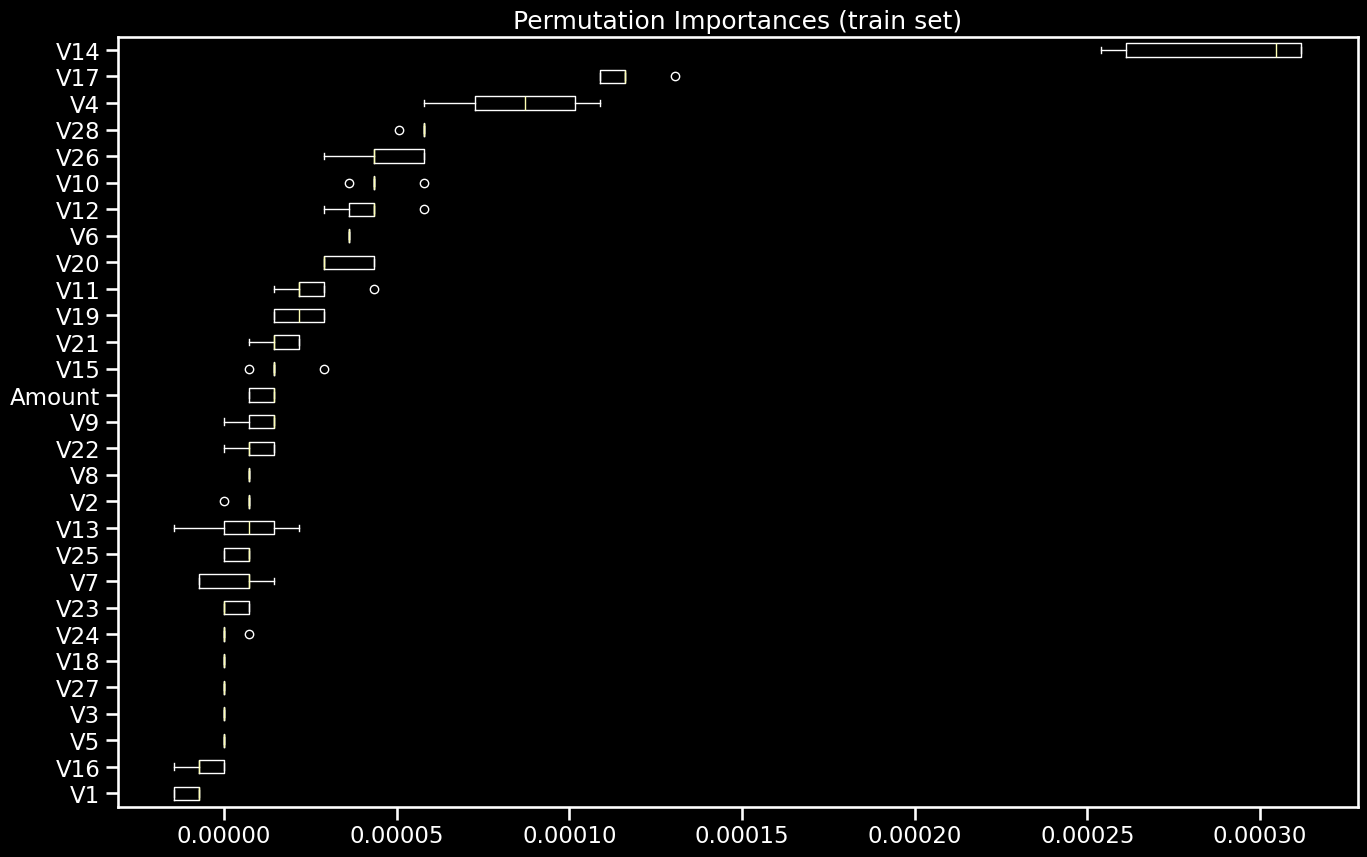

In [35]:
from sklearn.inspection import permutation_importance, PartialDependenceDisplay

to=time.time()
feature_importances = permutation_importance(estimator=vc, X = X_train, y = y_train, n_repeats=5,
                                random_state=123, n_jobs=-1)
t1 = time.time()
print((t1-t0)/60, 'mins \n' )
visualize_feature_importance( feature_importances )

### Surrogate models

In [36]:
lm_surrogate = LogisticRegression(max_iter=1000, 
                                  random_state=123, penalty='l1', solver='liblinear')
lm_surrogate.fit(X_test, y_pred_vc)
y_surrogate = lm_surrogate.predict(X_test)
print(eval_metrics(y_pred_vc, y_surrogate))

{'type': 'Train_Test_split', 'accuracy': 0.9994921353531836, 'precision': 0.906832298136646, 'recall': 0.7263681592039801, 'fscore': 0.8066298342541437, 'auc': np.float64(0.8631295860649236), 'model': 'model'}


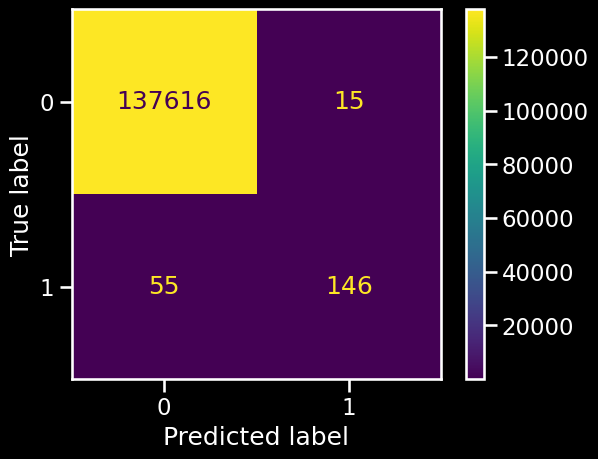

In [37]:
cf_plot(y_pred_vc, y_surrogate, lm_surrogate)

In [38]:
def get_feature_coefs(regression_model):
    coef_dict = {}
    # Filter coefficients less than 0.01
    for coef, feat in zip(regression_model.coef_[0, :], df.drop('Class', axis=1).columns):
        if abs(coef) >= 0.01:
            coef_dict[feat] = coef
    # Sort coefficients
    coef_dict = {k: v for k, v in sorted(coef_dict.items(), key=lambda item: item[1])}
    return coef_dict

coef_dict = get_feature_coefs(lm_surrogate)
coef_dict

{'V14': np.float64(-24.865218425904498),
 'V10': np.float64(-7.134547307524678),
 'V16': np.float64(-6.0924399877202084),
 'V17': np.float64(-3.9334965594982787),
 'V18': np.float64(-0.6866633616512829),
 'V2': np.float64(0.12480555729016851),
 'V19': np.float64(2.2382310418941644),
 'V11': np.float64(2.246481380213619),
 'V22': np.float64(6.745383051369601),
 'V4': np.float64(9.429651548337539)}

In [44]:
# Generate bar colors based on if value is negative or positive
def get_bar_colors(values):
    color_vals = []
    for val in values:
        if val <= 0:
            color_vals.append('r')
        else:
            color_vals.append('g')
    return color_vals

# Visualize coefficients
def visualize_coefs(coef_dict):
    features = list(coef_dict.keys())
    values = list(coef_dict.values())
    y_pos = np.arange(len(features))
    color_vals = get_bar_colors(values)
    #plt.rcdefaults()
    fig, ax = plt.subplots()
    ax.barh(y_pos, values, align='center', color=color_vals)
    ax.set_yticks(y_pos)
    ax.set_yticklabels(features)
    # labels read top-to-bottom
    ax.invert_yaxis()  
    ax.set_xlabel('Feature Coefficients')
    ax.set_title('')
    plt.show()


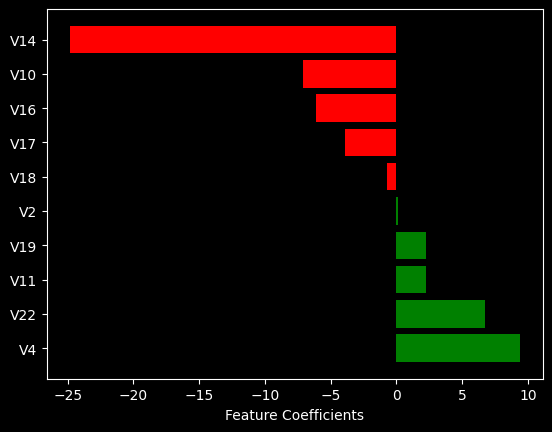

In [45]:
visualize_coefs(coef_dict)

## 6. Conclusion and next steps <a class="anchor" id="conclusion"></a>

We worked with a dataset containing information about credict card transactions and our objective was to determine whether a credit card transaction was fraudulent or not. That is, our aim was to find a classification model that performs well on precision, recall, and fscore. We focused on these metrics due to the fact that the dataset is highly unbalanced.

The model found to perform best (among the models considered) is a Voting Classifier constructed from an ensemble of models containing the following ones: Log-Regression, KNN, SVC, Bagging Trees, Random Forest, and XGBoost. This Voting Classifier yiels a Precision $\approx 0.95$, a Recall $\approx 0.81$, and a Fscore $\approx 0.87$. Moreover, we performed Permutation Feature Importance (PFI) analysis and use a Logistic Regression as a Global Surrogated Model, from their results it seems that the feature 'V14' is the most important one for the classification.

The main challenge for this study was the lack of computational resources (everything was run in a laptop with 16gp of ram memory and 4 cores). In order to reduce the computational time, to perform the cross validations and PFI, we have decided to use large test sets, about 50% of the data. With better computational resources a more exhaustive search for the best hyperparameters can be achieve and, presumably, better results as well.